In [1]:
import pandas as pd

# Load the provided Excel file
file_path = '/content/sample_data/다중회귀_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,YYYYMM,CH_EXP,FLEET_DEV,CNTR_TIMECHART,WTI,R_GDP_WORLD,DEFLATOR_WORLD,R_GDP_USA,CLI_USA,PMI_US,DEFLATOR_USA,G_RELI,G_DELAY,SCFI_C
0,2014-01,21790540,17312194,46.79983,94.6,1.787676e+07,109.776667,4173.316667,100.7090,53.7,102.690000,0.694882,3.948304,1174.866
1,2014-02,9977430,17385239,46.71077,100.8,1.791018e+07,110.063333,4168.433333,100.7202,57.1,102.830000,0.681136,4.267981,1069.362
2,2014-03,17115050,17367549,46.70015,100.8,1.794359e+07,110.350000,4163.550000,100.7613,55.5,102.970000,0.721154,3.897523,969.145
3,2014-04,20089670,17534040,47.20250,102.1,1.799153e+07,110.543333,4181.376667,100.8148,55.4,103.163333,0.732795,3.648607,1078.462
4,2014-05,20500550,17701139,46.95479,102.2,1.803947e+07,110.736667,4199.203333,100.8649,56.4,103.356667,0.753047,3.736327,1137.112


# 도표 15-4. ChatGPT의 Correlation Matrix 생성
아래 코드 추가 필요

desc_stats = data.describe() # 숫자형 데이터에 대한 통계를 계산

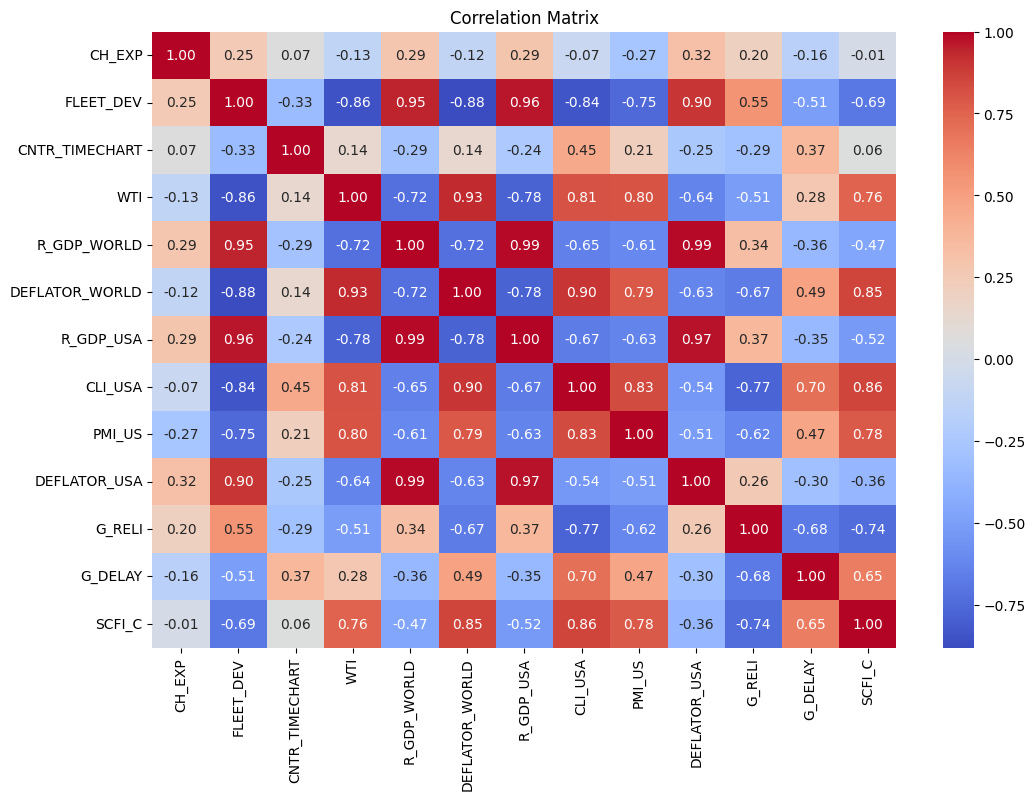

(             CH_EXP     FLEET_DEV  CNTR_TIMECHART         WTI   R_GDP_WORLD  \
 count  4.500000e+01  4.500000e+01       45.000000   45.000000  4.500000e+01   
 mean   1.964203e+07  1.929314e+07       46.700395   59.242222  1.886537e+07   
 std    2.654862e+06  1.048479e+06        6.090763   22.541028  5.980392e+05   
 min    9.977430e+06  1.731219e+07       37.861100   30.300000  1.787676e+07   
 25%    1.894893e+07  1.834581e+07       42.025050   45.500000  1.837868e+07   
 50%    2.023185e+07  1.980082e+07       46.954790   49.800000  1.884698e+07   
 75%    2.113707e+07  2.018098e+07       48.868190   59.800000  1.932983e+07   
 max    2.316193e+07  2.060250e+07       63.071860  105.800000  1.996164e+07   
 
        DEFLATOR_WORLD    R_GDP_USA     CLI_USA     PMI_US  DEFLATOR_USA  \
 count       45.000000    45.000000   45.000000  45.000000     45.000000   
 mean       102.789333  4358.919778   99.985621  53.800000    105.108667   
 std          4.431518   101.689518    0.674319   

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics of the dataset
desc_stats = data.describe() # 숫자형 데이터에 대한 통계를 계산

# 숫자형 데이터만을 선택한다.
numeric_data = data.select_dtypes(include=['float64', 'int64']) # YYYYMM 제외
# Correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

desc_stats, corr_matrix['SCFI_C']


# 도표 5-12. 선형회귀모형 기본 파이썬코드

In [3]:
# Scikit-learn 라이브러리에서 사용되는 주요 모듈을 설치한다.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the dataset for regression analysis
# YYYYMM is a time variable, we will exclude it from regression but keep it for time series analysis if needed
X = data.drop(['SCFI_C', 'YYYYMM'], axis=1)
y = data['SCFI_C']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(4125.338068483129, 0.9097917829940816)

# 도표 15-6. ChatGPT의 다중회귀모형 회귀식 답변

In [4]:
# Extracting coefficients and intercept from the model
coefficients = model.coef_
intercept = model.intercept_

# Creating the regression equation
regression_eq = f"SCFI_C = {intercept:.2f} "

# Adding each coefficient and its corresponding variable to the equation
for coef, var in zip(coefficients, X.columns):
    regression_eq += f"+ ({coef:.2f}) * {var} "

regression_eq


'SCFI_C = 7937.47 + (0.00) * CH_EXP + (-0.00) * FLEET_DEV + (-11.77) * CNTR_TIMECHART + (-0.73) * WTI + (-0.00) * R_GDP_WORLD + (1.37) * DEFLATOR_WORLD + (2.54) * R_GDP_USA + (-226.73) * CLI_USA + (38.47) * PMI_US + (151.65) * DEFLATOR_USA + (-520.59) * G_RELI + (108.50) * G_DELAY '

# statsmodel 기반 모형

In [5]:
import statsmodels.api as sm

# 다중 회귀 모델 학습 (훈련 데이터 사용)
X_train = sm.add_constant(X_train)  # 절편 추가
model_sm = sm.OLS(y_train, X_train).fit()

# 도표 5-17. 회귀분석의 통계량 파이썬 코드

In [6]:
# statsmodels를 사용하여 통계정보를 추출한다(sm.OLS 모형에 기반하여 모형개발: 도표 5-27 참조).
multiple_correlation = model_sm.rsquared**0.5     # 다중 상관계수는 결정계수를 제곱근함
r_squared = model_sm.rsquared                     # 결정계수
adjusted_r_squared = model_sm.rsquared_adj        # 조정된 결정계수
standard_error = model_sm.scale**0.5              # 표준오차는 잔차의 분산를 제곱근함
f_value = model_sm.fvalue                         # 모델의 전반적인 유의성을 나타내는 F-통계량 값
f_pvalue = model_sm.f_pvalue                      # F-통계량에 관련된 p-값

regression_stats = pd.DataFrame({
    'Statistic': ['Multiple Correlation Coefficient', 'R-squared', 'Adjusted R-squared', 'Standard Error of Regression', 'F-statistic', 'F-statistic p-value'],
    'Value': [multiple_correlation, r_squared, adjusted_r_squared, standard_error, f_value, f_pvalue]
})

regression_stats


,Statistic,Value
0,Multiple Correlation Coefficient,9.742440e-01
1,R-squared,9.491514e-01
2,Adjusted R-squared,9.152523e-01
3,Standard Error of Regression,5.737842e+01
4,F-statistic,2.799934e+01
5,F-statistic p-value,3.600444e-09


# 도표 5-17. 회귀계수, 표준오차, t-통계량, p-value, VIF 계산 파이썬 코드

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 훈련데이터에 대해 VIF 데이터프레임을 준비하고, VIF 계산한다.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

# 회귀계수, 표준오차, t-값, p-값을 준비한다.
coefficients = model_sm.params    # 회귀 계수를 추출함
std_errors = model_sm.bse              # 표준 오차를 추출함
t_values = model_sm.tvalues           # t-값을 추출함.
p_values = model_sm.pvalues        # p-값을 추출함

regression_results = pd.DataFrame({'Coefficient': coefficients,
                                   'Standard Error': std_errors,
                                   't-value': t_values,
                                   'p-value': p_values,
                                   'VIF': vif_data.set_index('feature')['VIF']})
# 데이터프레임을 재구성하고 변수명을 변경한다.
regression_results.reset_index(inplace=True)
regression_results.rename(columns={'index': 'Variable'}, inplace=True)

regression_results.sort_values(by='VIF', ascending=False) # VIF에 따라 결과를 정렬한다.


,Variable,Coefficient,Standard Error,t-value,p-value,VIF
0,const,7937.466963,14048.988719,0.564985,0.579058,1.858466e+06
5,R_GDP_WORLD,-0.000172,0.000532,-0.323903,0.749745,8.765439e+02
7,R_GDP_USA,2.543050,2.728894,0.931898,0.363721,6.669477e+02
2,FLEET_DEV,-0.000530,0.000235,-2.253366,0.036944,5.373364e+02
10,DEFLATOR_USA,151.649680,160.143558,0.946961,0.356199,4.467106e+02
8,CLI_USA,-226.726872,251.808684,-0.900393,0.379800,2.496601e+02
6,DEFLATOR_WORLD,1.367738,25.938251,0.052731,0.958527,1.121663e+02
4,WTI,-0.726693,3.294886,-0.220552,0.827924,4.101069e+01
12,G_DELAY,108.497881,59.043205,1.837601,0.082686,1.043717e+01
3,CNTR_TIMECHART,-11.773831,4.419467,-2.664084,0.015811,8.112051e+00


# (참조) 훈련데이터에 대한 통계량

In [8]:
# 훈련 데이터에 대한 통계량
# 결과 요약
summary = model_sm.summary()
summary.tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
const,7937.4670,1.4e+04,0.565,0.579,-2.16e+04,3.75e+04
CH_EXP,1.91e-05,5.49e-06,3.480,0.003,7.57e-06,3.06e-05
FLEET_DEV,-0.0005,0.000,-2.253,0.037,-0.001,-3.58e-05
CNTR_TIMECHART,-11.7738,4.419,-2.664,0.016,-21.059,-2.489
WTI,-0.7267,3.295,-0.221,0.828,-7.649,6.196
R_GDP_WORLD,-0.0002,0.001,-0.324,0.750,-0.001,0.001
DEFLATOR_WORLD,1.3677,25.938,0.053,0.959,-53.127,55.862
R_GDP_USA,2.5431,2.729,0.932,0.364,-3.190,8.276
CLI_USA,-226.7269,251.809,-0.900,0.380,-755.757,302.304
PMI_US,38.4724,15.722,2.447,0.025,5.441,71.503


# 도표 5-19. 잔차에 대한 기술통계 분석 결과

In [9]:
# 데이터 전체에 대해 예측값과 잔차 계산
y_pred = model.predict(X)
residuals = y - y_pred

# 1. 기술통계 분석
desc_stats = residuals.describe()
desc_stats

count     45.000000
mean       5.597204
std       51.258267
min      -98.875294
25%      -23.333858
50%       11.249350
75%       45.107165
max      106.229939
Name: SCFI_C, dtype: float64

# 표 5-20. 잔차의 정규성 검정과 독립성 검정

In [10]:
import scipy.stats as stats

# 2. 잔차의 정규성 검정 (Shapiro-Wilk Test)
shapiro_test = stats.shapiro(residuals)

# 3. 잔차와 예측치의 독립성 검정 (Durbin-Watson Test)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)

shapiro_test, durbin_watson

(ShapiroResult(statistic=0.9786495566368103, pvalue=0.5660222172737122),
 1.8403323997809276)

# 도표 5-21. 잔차의 등분산성 검정 결과

In [11]:
# import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test (잔차의 등분산성 검정)
# 상수 항 포함한 독립 변수 행렬 사용
X_with_constant = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_with_constant)
bp_test_stat, bp_test_pvalue, _, _ = bp_test

# 결과 출력
bp_test_stat, bp_test_pvalue

(4.429009132503807, 0.9743936423101246)

# 도표 5-22. 잔차와 독립변수의 상관성 검정 결과

In [12]:
import numpy as np

residuals_corr = X.apply(lambda x: np.corrcoef(x, residuals)[0, 1])
residuals_corr


CH_EXP            0.028482
FLEET_DEV        -0.009367
CNTR_TIMECHART    0.085415
WTI               0.071770
R_GDP_WORLD       0.018222
DEFLATOR_WORLD    0.041609
R_GDP_USA        -0.007955
CLI_USA           0.028392
PMI_US           -0.028818
DEFLATOR_USA      0.037761
G_RELI            0.059192
G_DELAY          -0.075590
dtype: float64

# [2-5. 실제 데이터에 적용하여 검증]

In [13]:
# Define the dependent and independent variables
X = data.drop(columns=['YYYYMM', 'SCFI_C'])
y = data['SCFI_C']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
train_residuals_mean = train_residuals.mean()
test_residuals_mean = test_residuals.mean()
train_residuals_std = train_residuals.std()
test_residuals_std = test_residuals.std()

# Calculate the adjusted R-squared values for both training and testing datasets
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(y_train)
n_test = len(y_test)
k = X.shape[1]

adj_r2_train = adjusted_r2(r2_train, n_train, k)
adj_r2_test = adjusted_r2(r2_test, n_test, k)

# Calculate the adjusted R-squared values for both training and testing datasets without using append
results = pd.DataFrame({
    'Metric': [
        'R2 (Train)',
        'R2 (Test)',
        'Mean Residuals (Train)',
        'Mean Residuals (Test)',
        'Std Residuals (Train)',
        'Std Residuals (Test)',
        'Adjusted R2 (Train)',
        'Adjusted R2 (Test)'
    ],
    'Value': [
        r2_train,
        r2_test,
        train_residuals_mean,
        test_residuals_mean,
        train_residuals_std,
        test_residuals_std,
        adjusted_r2(r2_train, n_train, k),
        adjusted_r2(r2_test, n_test, k)
    ]
})
results

# Create a DataFrame to display the results in the specified format
results_transposed = pd.DataFrame({
    'Metric': [
        'R2',
        'Mean Residuals',
        'Std Residuals',
        'Adjusted R2'
    ],
    'Train': [
        r2_train,
        train_residuals_mean,
        train_residuals_std,
        adjusted_r2(r2_train, n_train, k)
    ],
    'Test': [
        r2_test,
        test_residuals_mean,
        test_residuals_std,
        adjusted_r2(r2_test, n_test, k)
    ]
})

results_transposed


,Metric,Train,Test
0,R2,9.491514e-01,0.909792
1,Mean Residuals,-3.980873e-12,17.991012
2,Std Residuals,4.444513e+01,63.985131
3,Adjusted R2,9.152523e-01,-0.172707


# 도표 5-25. 5-폴드 교차검증을 수행한 결과

In [14]:
from sklearn.model_selection import cross_val_score

# Create the linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Create a summary of the cross-validation results
cv_results = pd.DataFrame({
    'Metric': ['Cross-Validation R2 (Mean)', 'Cross-Validation R2 (Std Dev)'],
    'Value': [cv_mean, cv_std]
})

cv_results


,Metric,Value
0,Cross-Validation R2 (Mean),-0.877868
1,Cross-Validation R2 (Std Dev),1.543798
